In [1]:
from os.path import join
import joblib
import pickle
import sys
sys.path.append('/g/g15/cedre/')
sys.path.append('/g/g15/cedre/cnrg')
sys.path.append('/g/g15/cedre/cnrg/utils')
sys.path.append('/g/g15/cedre/pysparkplug')
sys.path.append('/g/g15/cedre/pysparkplug/pysp')

from tqdm import tqdm
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
rng = np.random.RandomState()

In [2]:
sys.path.append('/g/g15/cedre/gonzalez_mrhyde/scripts')
from data_scripts import read_data, create_graphs
from rule_to_rule_scripts import convert_LMG, decompose, ancestor, common_ancestor
from rule_to_rule_scripts import update_grammar_independent, update_rule_case1, update_rule_case2

In [9]:
def compute_stats(graphs, stat='all'):
    assert stat in ['all', 'triangles', 'transitivity', 'clustering', 'spectrum', 'degree']
    
    stats = {'triangles': [],
             'transitivity': [],
             'clustering': [],
             #'diameter': [],
             #'edit': [],
             'spectrum': [],
             'degree': []
            }
    
    for itr, graph in tqdm(enumerate(graphs)):
        if stat == 'triangles' or stat == 'all':
            stats['triangles'].append(round(sum(nx.triangles(graph).values()) / 3, 4))
        
        if stat == 'transitivity' or stat == 'all':
            stats['transitivity'].append(round(nx.transitivity(graph), 4))
        
        if stat == 'clustering' or stat == 'all':
            stats['clustering'].append(round(nx.average_clustering(graph), 4))
        
        if stat == 'spectrum' or stat == 'all':
            stats['spectrum'].append(round(max(nx.laplacian_spectrum(graph)), 4))

        if stat == 'degree' or stat == 'all':
            stats['degree'].append(round(np.mean([graph.degree(v) for v in graph.nodes()]), 4))

        #stats['diameter'].append(nx.diameter(graph))  # slow
        #stats['edit'].append(nx.graph_edit_distance(graphs[max(0, itr - 1)], graph))  # way too slow
        
    return stats

def print_stats(stats):
    print(type(stats))
    k = len(stats['triangles'])
    print('Δ\ttrans\tavg cc\tspectral radius')
    for itr in range(k):
        print(f'{stats["triangles"][itr]}\t' +
              f'{stats["transitivity"][itr]}\t' +
              f'{stats["clustering"][itr]}\t' +
              f'{stats["spectrum"][itr]}')

def plot_stat(dataname, stat):
    assert stat in ['triangles', 'transitivity', 'clustering', 'spectrum', 'degree']
    
    stat_name = 'triangle count' if stat == 'triangles' else \
                'transitivity' if stat == 'transitivity' else \
                'clustering coefficient' if stat == 'clustering' else \
                'spectral radius' if stat == 'spectrum' else \
                'average degree' if stat == 'degree' else ''
    
    args = ['ipynb',
        'use_mathtext',
        'colors5-light',
       ] if False else []
    
    lookbacks = list(range(11))
    
    with plt.style.context(args):
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.ticklabel_format(style='plain')

        for lookback in lookbacks:
            graphs, years = read_data(dataname=dataname, lookback=lookback)
            stats = compute_stats(graphs, stat)
            
            xs = years
            ys = [stats[stat][itr] for itr in range(len(graphs))]
            
            #rho = stats.spearmanr(xs, ys)
            #rhos[lookback] = round(rho.correlation, 4)

            ax.plot([lookback for _ in xs], xs, ys)

        ax.set_title(f'{dataname}: {stat_name}')
        ax.set_xlabel('amount of lookback')
        ax.set_ylabel('time')
        ax.set_zlabel(stat_name)
        plt.gca().invert_xaxis()
        #ax.legend([f'lookback = {x},    rho = {rhos[x]}' for x in lookbacks], bbox_to_anchor=(2.1, 1.05))
        plt.savefig(f'../figures/stats_{dataname}_{stat}_3D.svg', bbox_inches='tight')


In [4]:
datadir = '/g/g15/cedre/gonzalez_mrhyde/data'
T = 10

# fb-messages

In [5]:
dataname = 'fb-messages'
graphs, years = read_data(dataname='fb-messages', lookback=0)

10it [00:01,  6.05it/s]
10it [00:00, 14.62it/s]
10it [00:01,  6.40it/s]
10it [00:02,  3.99it/s]
10it [00:03,  2.93it/s]
10it [00:04,  2.32it/s]
10it [00:05,  1.94it/s]
10it [00:06,  1.64it/s]
10it [00:06,  1.51it/s]
10it [00:06,  1.43it/s]
10it [00:07,  1.38it/s]


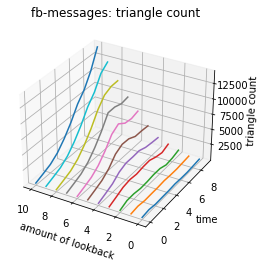

In [11]:
plot_stat(dataname, 'triangles')

10it [00:01,  6.09it/s]
10it [00:00, 14.59it/s]
10it [00:01,  6.58it/s]
10it [00:02,  4.08it/s]
10it [00:03,  2.94it/s]
10it [00:04,  2.26it/s]
10it [00:05,  1.87it/s]
10it [00:06,  1.59it/s]
10it [00:07,  1.38it/s]
10it [00:06,  1.43it/s]
10it [00:07,  1.40it/s]


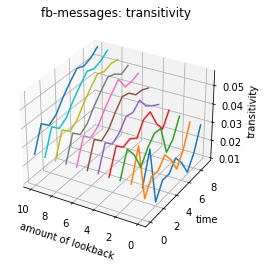

In [12]:
plot_stat(dataname, 'transitivity')

10it [00:01,  5.80it/s]
10it [00:00, 14.43it/s]
10it [00:01,  6.47it/s]
10it [00:02,  4.05it/s]
10it [00:03,  2.93it/s]
10it [00:04,  2.26it/s]
10it [00:05,  1.87it/s]
10it [00:05,  1.68it/s]
10it [00:06,  1.52it/s]
10it [00:07,  1.41it/s]
10it [00:07,  1.39it/s]


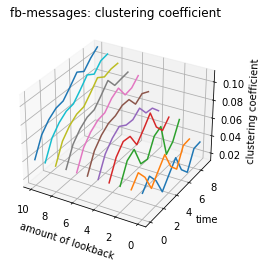

In [13]:
plot_stat(dataname, 'clustering')

10it [00:00, 13.48it/s]
10it [00:00, 17.05it/s]
10it [00:01,  9.88it/s]
10it [00:01,  7.09it/s]
10it [00:01,  5.68it/s]
10it [00:01,  5.12it/s]
10it [00:02,  4.95it/s]
10it [00:02,  4.65it/s]
10it [00:02,  4.48it/s]
10it [00:02,  4.26it/s]
10it [00:02,  4.30it/s]


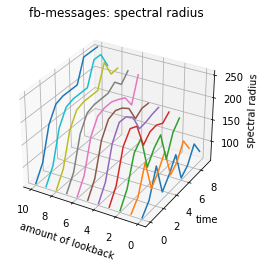

In [14]:
plot_stat(dataname, 'spectrum')

10it [00:00, 45.62it/s]
10it [00:00, 94.05it/s]
10it [00:00, 63.10it/s]
10it [00:00, 52.40it/s]
10it [00:00, 46.36it/s]
10it [00:00, 42.85it/s]
10it [00:00, 40.05it/s]
10it [00:00, 34.86it/s]
10it [00:00, 36.90it/s]
10it [00:00, 35.34it/s]
10it [00:00, 34.86it/s]


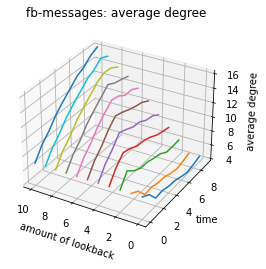

In [10]:
plot_stat(dataname, 'degree')

# email-dnc

In [ ]:
dataname = 'email-dnc'
graphs, years = read_data(dataname=dataname, lookback=0)

In [ ]:
stats = compute_stats(graphs)

In [ ]:
print_stats(stats)

# ca-cit-HepTh

In [ ]:
dataname = 'ca-cit-HepTh'
path = join(datadir, dataname, f'{dataname}.edges')

graph_data = nx.read_edgelist(path,
                              delimiter=' ',
                              nodetype=int,
                              data=[('', int), ('time', int)])

In [ ]:
edges = sorted([(u, v, d['time']) for u, v, d in graph_data.edges(data=True)],
               key=lambda x: x[2])
times = sorted([t for u, v, t in edges])
delta = len(times) // T

edge_brackets = [edges[k * delta:(k + 1) * delta]
                 for k in range(T + 1)]
edge_brackets[T - 1] += edge_brackets[T]
del edge_brackets[T]

edges_clean = [[(u, v) for u, v, t in bracket]
               for bracket in edge_brackets]

graphs = [graph_data.edge_subgraph(clean)
          for clean in edges_clean]

In [ ]:
stats(graphs, T)

# ca-cit-HepPh

In [ ]:
dataname = 'ca-cit-HepPh'
path = join(datadir, dataname, f'{dataname}.edges')

graph_data = nx.read_edgelist(path,
                              delimiter=' ',
                              nodetype=int,
                              data=[('', int), ('time', int)])

In [ ]:
edges = sorted([(u, v, d['time']) for u, v, d in graph_data.edges(data=True)],
               key=lambda x: x[2])
times = sorted([t for u, v, t in edges])
delta = len(times) // T

edge_brackets = [edges[k * delta:(k + 1) * delta]
                 for k in range(T + 1)]
edge_brackets[T - 1] += edge_brackets[T]
del edge_brackets[T]

edges_clean = [[(u, v) for u, v, t in bracket]
               for bracket in edge_brackets]

graphs = [graph_data.edge_subgraph(clean)
          for clean in edges_clean]

In [ ]:
stats(graphs, T)

# tech-as-topology

In [ ]:
dataname = 'tech-as-topology'
path = join(datadir, dataname, f'{dataname}.edges')

with open(path, 'r') as infile:
    for line in infile:
        u, v, k, t = map(int, line.strip().split(' '))
        if k != 1:
            print(k)

print('confirming that the third data point on each line is always 1')

In [ ]:
dataname = 'tech-as-topology'
path = join(datadir, dataname, f'{dataname}.edges')

graph_data = nx.read_edgelist(path,
                              delimiter=' ',
                              nodetype=int,
                              data=[('', int), ('time', int)])

In [ ]:
edges = sorted([(u, v, d['time']) for u, v, d in graph_data.edges(data=True)],
               key=lambda x: x[2])
times = sorted([t for u, v, t in edges])
delta = len(times) // T

edge_brackets = [edges[k * delta:(k + 1) * delta]
                 for k in range(T + 1)]
edge_brackets[T - 1] += edge_brackets[T]
del edge_brackets[T]

edges_clean = [[(u, v) for u, v, t in bracket]
               for bracket in edge_brackets]

graphs = [graph_data.edge_subgraph(clean)
          for clean in edges_clean]

In [ ]:
stats(graphs, T)